In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
yol = '/content/drive/MyDrive/AII2024/'

os.chdir(yol)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



KNN
Confusion Matrix:
[[68  3]
 [ 3 40]]
Accuracy: 0.95
Sensitivity (Recall): 0.93
Specificity: 0.96
Precision: 0.93
F1 Score: 0.93


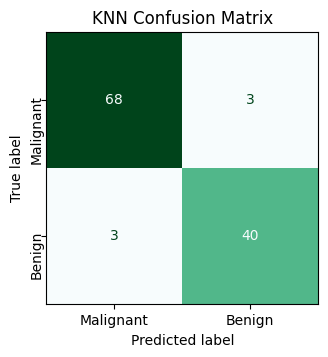

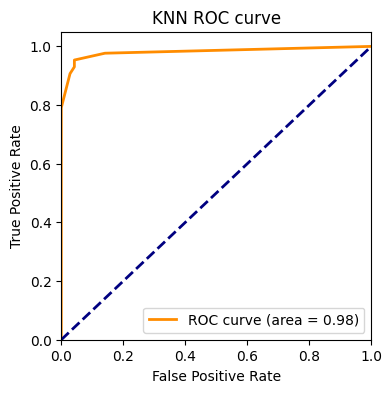


MLP
Confusion Matrix:
[[70  1]
 [ 2 41]]
Accuracy: 0.97
Sensitivity (Recall): 0.95
Specificity: 0.99
Precision: 0.98
F1 Score: 0.96


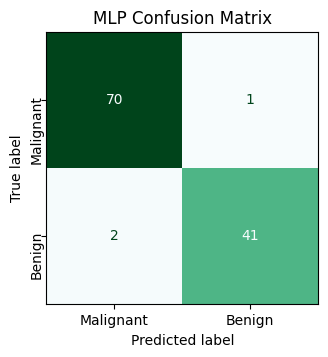

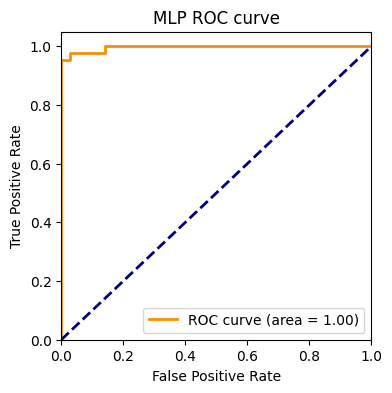


Naive Bayes
Confusion Matrix:
[[70  1]
 [ 3 40]]
Accuracy: 0.96
Sensitivity (Recall): 0.93
Specificity: 0.99
Precision: 0.98
F1 Score: 0.95


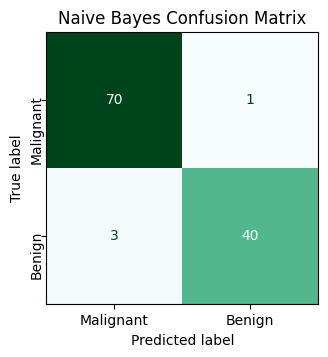

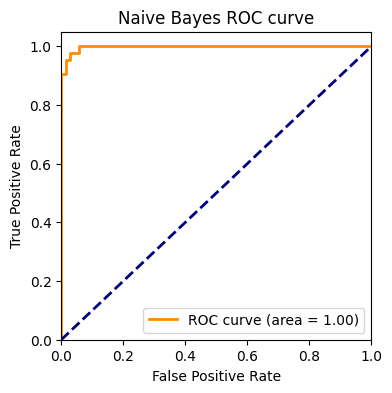


SVM
Confusion Matrix:
[[71  0]
 [ 2 41]]
Accuracy: 0.98
Sensitivity (Recall): 0.95
Specificity: 1.00
Precision: 1.00
F1 Score: 0.98


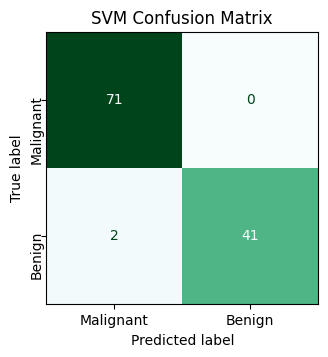

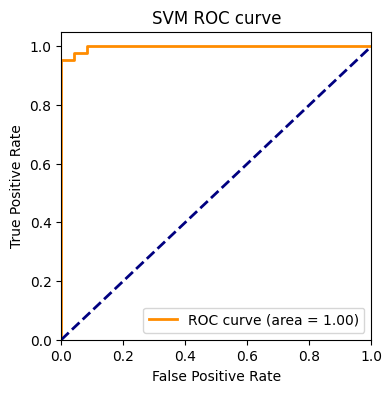


Logistic Regression
Confusion Matrix:
[[70  1]
 [ 2 41]]
Accuracy: 0.97
Sensitivity (Recall): 0.95
Specificity: 0.99
Precision: 0.98
F1 Score: 0.96


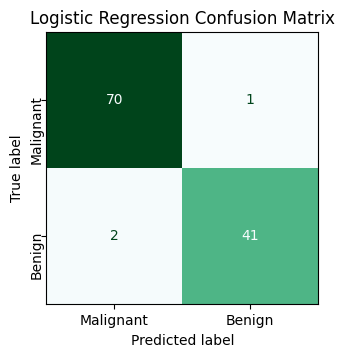

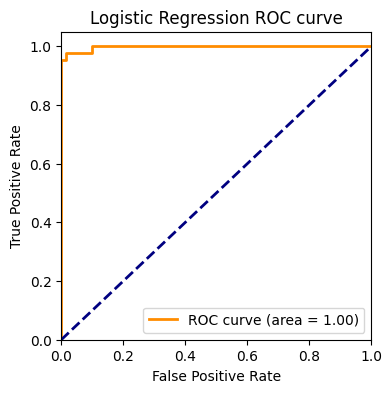


Decision Tree
Confusion Matrix:
[[67  4]
 [ 3 40]]
Accuracy: 0.94
Sensitivity (Recall): 0.93
Specificity: 0.94
Precision: 0.91
F1 Score: 0.92


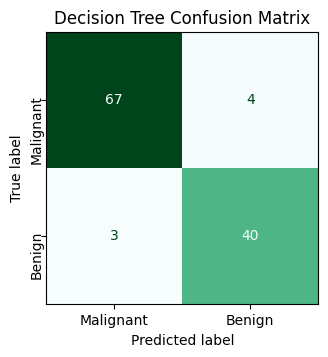

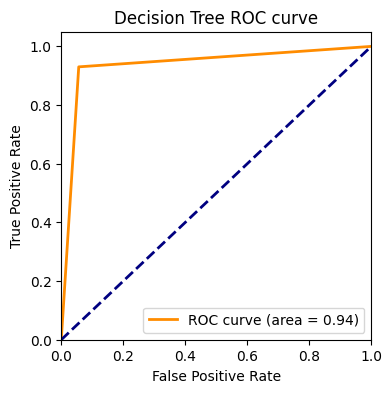

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


df = pd.read_csv('data.csv')


target_column = 'diagnosis'


df_numeric = pd.get_dummies(df.drop(columns=[target_column]))


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df_numeric)


X = StandardScaler().fit_transform(X)


le = LabelEncoder()
y = le.fit_transform(df[target_column])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def calculate_metrics(y_true, y_pred, y_score=None, model_name="model"):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])

    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Sensitivity (Recall): {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")

   
    class_names = ['Malignant', 'Benign']
    plt.figure(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.BuGn, ax=plt.gca(), colorbar=False)

 
    plt.gca().yaxis.set_label_position("left")  
    plt.gca().set_yticklabels(class_names, rotation=90, ha="center")
    plt.subplots_adjust(left=0.2, bottom=0.2)
    plt.title(f'{model_name} Confusion Matrix')
    plt.savefig(f'/content/drive/MyDrive/AII2024/{model_name}_confusion_matrix.png', transparent=True)
    plt.show()

    if y_score is not None:
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(4, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC curve')
        plt.legend(loc="lower right")
        plt.savefig(f'/content/drive/MyDrive/AII2024/{model_name}_ROC.png', transparent=True)
        plt.show()


print("\nKNN")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)[:, 1]
calculate_metrics(y_test, knn_pred, knn_proba, model_name="KNN")


print("\nMLP")
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_proba = mlp.predict_proba(X_test)[:, 1]
calculate_metrics(y_test, mlp_pred, mlp_proba, model_name="MLP")


print("\nNaive Bayes")
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_proba = nb.predict_proba(X_test)[:, 1]
calculate_metrics(y_test, nb_pred, nb_proba, model_name="Naive Bayes")


print("\nSVM")
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_proba = svm.predict_proba(X_test)[:, 1]
calculate_metrics(y_test, svm_pred, svm_proba, model_name="SVM")

print("\nLogistic Regression")
logreg = LogisticRegression(max_iter=200, random_state=42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_proba = logreg.predict_proba(X_test)[:, 1]
calculate_metrics(y_test, logreg_pred, logreg_proba, model_name="Logistic Regression")


print("\nDecision Tree")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_proba = dt.predict_proba(X_test)[:, 1]
calculate_metrics(y_test, dt_pred, dt_proba, model_name="Decision Tree")
